In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

In [2]:
import numpy as np
import warnings
from scipy.optimize import minimize
from scipy import stats
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from branching_process.util import plots

In [3]:
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model
sim = reload(sim)
influence = reload(influence)
model = reload(model)


Automatic pdb calling has been turned OFF


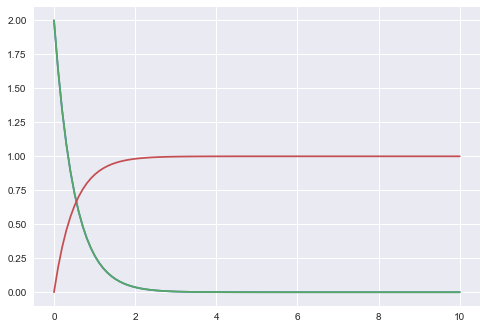

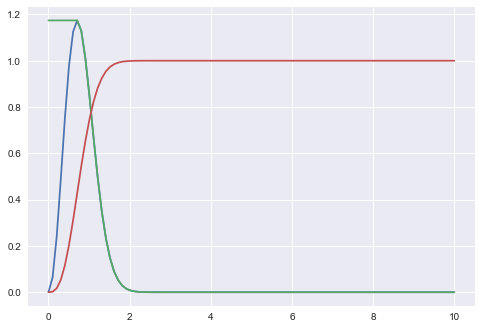

In [4]:
%pdb off
influence = reload(influence)
exp_phi = influence.ExpKernel()
causal_phi = influence.MaxwellKernel()
eval_ts = np.linspace(0, 10, 100)
tau=0.5

plt.figure();
plt.plot(eval_ts, exp_phi(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, exp_phi.majorant(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, exp_phi.integrate(eval_ts, tau=tau).ravel());

plt.figure();
plt.plot(eval_ts, causal_phi(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, causal_phi.majorant(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, causal_phi.integrate(eval_ts, tau=tau).ravel());


Automatic pdb calling has been turned ON


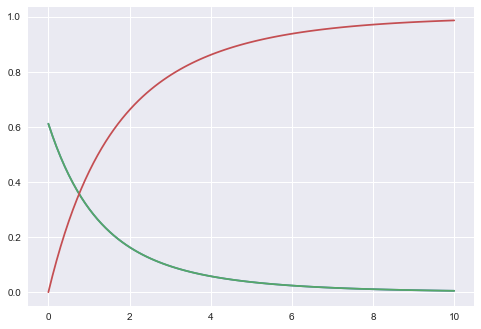

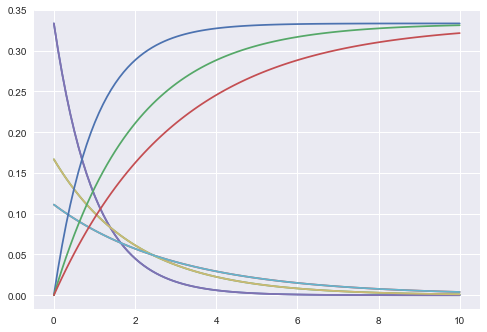

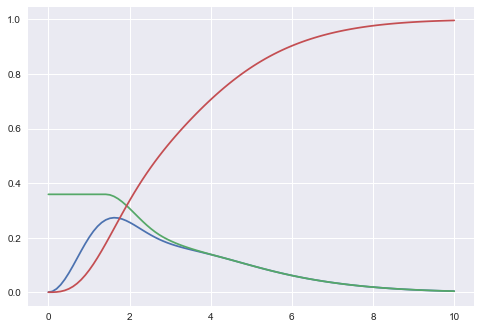

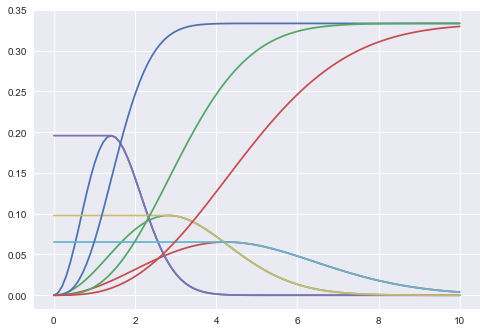

In [5]:
%pdb on
influence = reload(influence)
exp_phi = influence.ExpKernel(n_bases=3)
causal_phi = influence.MaxwellKernel(n_bases=3)
eval_ts = np.linspace(0, 10, 100)
tau=np.array([1,2,3])

plt.figure();
plt.plot(eval_ts, exp_phi(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.majorant(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.integrate(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, exp_phi.call_each(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.majorant_each(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.integrate_each(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, causal_phi(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.majorant(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.integrate(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, causal_phi.call_each(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.majorant_each(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.integrate_each(eval_ts, tau=tau));


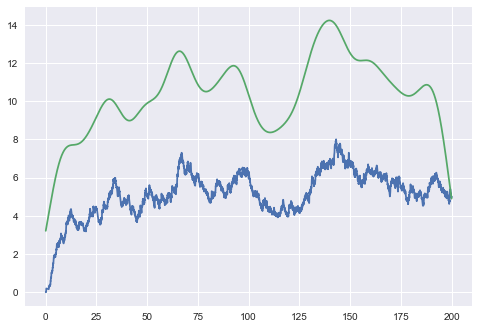

In [8]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, background
background = reload(background)
sim = reload(sim)
influence = reload(influence)
model = reload(model)

fixed_exp_phi = influence.ExpKernel(tau=5, kappa=np.array([0.5]))

param_exp = dict(
    phi_kernel=fixed_exp_phi,
    mu=5.0,
    t_start=0.0,
    t_end=200)

ts = sim.sim_hawkes(sort=True, **param_exp)
eval_ts = np.linspace(param_exp['t_start'], param_exp['t_end'], 5000)

cond_intensity = model.lam_hawkes(ts, eval_ts=eval_ts, **param_exp)
uncond_intensity = model.lam(ts, eval_ts=eval_ts)
plt.plot(eval_ts, cond_intensity);
plt.plot(eval_ts, uncond_intensity);

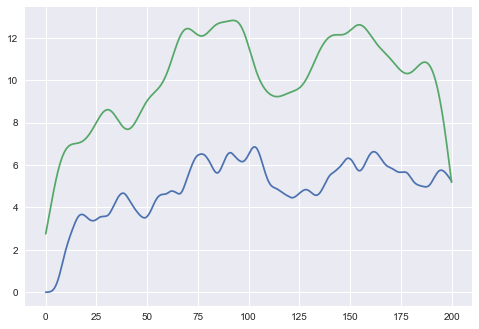

In [9]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, background
background = reload(background)
sim = reload(sim)
influence = reload(influence)
model = reload(model)

causal_phi = influence.MaxwellKernel(tau=5, kappa=np.array([0.5]))

param_causal = dict(
    phi_kernel=causal_phi,
    mu=5.0,
    t_start=0.0,
    t_end=200)

sim = reload(sim)
ts = np.sort(sim.sim_hawkes(**param_causal));
eval_ts = np.linspace(param_causal['t_start'], param_causal['t_end'], 5000)

cond_intensity = model.lam_hawkes(ts, eval_ts=eval_ts, **param_causal)
uncond_intensity = model.lam(ts, eval_ts=eval_ts)
plt.plot(eval_ts, cond_intensity);
plt.plot(eval_ts, uncond_intensity);

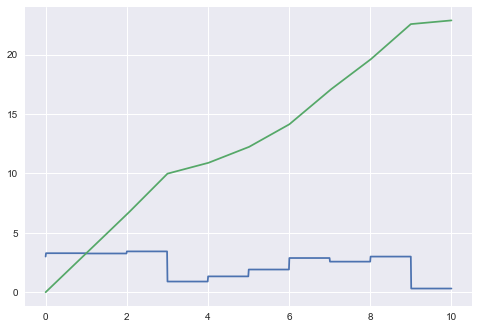

In [11]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, background
background = reload(background)
sim = reload(sim)
influence = reload(influence)
model = reload(model)

eval_ts = np.linspace(0, 10, 1000)
mu = 3
n_bases = 10
kappa = np.random.uniform(-1,1, size=n_bases)**3*3

step_phi = background.LinearStepKernel(n_bases=n_bases, t_end=10, mu=mu)

plt.figure();
plt.plot(eval_ts, step_phi(eval_ts, kappa=kappa));
plt.plot(eval_ts, step_phi.integrate(eval_ts, kappa=kappa));



In [9]:
%pdb on
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model
sim = reload(sim)
influence = reload(influence)
model = reload(model)

fixed_exp_phi = influence.ExpKernel(tau=5, kappa=0.5)
approx_kernel = influence.MaxwellKernel(n_bases=5, tau=np.array([1,2,3,4,5]))

param_exp = dict(
    phi_kernel=fixed_exp_phi,
    mu=5.0,
    t_start=0.0,
    t_end=200)

ts = sim.sim_hawkes(**param_exp);

print(
    model.loglik(ts=ts, mu=0.5, phi_kernel=approx_kernel, phi_kwargs=dict(kappa=np.array([0.5, 0.3, 0, 0, 0,]))),
    model.loglik(ts=ts, mu=5, phi_kernel=approx_kernel, phi_kwargs=dict(kappa=np.array([0.5, 0.3, 0, 0, 0,]))),
    model.loglik(ts=ts, mu=50, phi_kernel=approx_kernel, phi_kwargs=dict(kappa=np.array([0.5, 0.3, 0, 0, 0,]))),
)


Automatic pdb calling has been turned ON
[ 2648.89717595] [ 2631.47610141] [-3332.21464918]


In [28]:
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, fit
sim = reload(sim)
influence = reload(influence)
model = reload(model)
fit = reload(fit)

hawkes = fit.ContinuousExact(
     debug=True
)
fit = hawkes.fit(
    ts,
    phi_kernel=influence.MaxwellKernel(n_bases=5, tau=np.array([1,2,3,4,5])),
    fit_omega=False,
    fit_tau=False,
    max_steps=50,
)
print(fit.param)

TypeError: super(type, obj): obj must be an instance or subtype of type

> /Users/dan/Source/branching_process/branching_process/cts/influence.py(21)__init__()
     19         self._fixed_args.setdefault('kappa', np.ones(n_bases)/n_bases)
     20         self._fixed_args.setdefault('tau', np.arange(n_bases))
---> 21         self.n_bases = n_bases
     22         super(InfluenceKernel, self).__init__(*args)
     23 

ipdb> l
     16             n_bases=1,
     17             *args, **fixed_args):
     18         self._fixed_args = fixed_args
     19         self._fixed_args.setdefault('kappa', np.ones(n_bases)/n_bases)
     20         self._fixed_args.setdefault('tau', np.arange(n_bases))
---> 21         self.n_bases = n_bases
     22         super(InfluenceKernel, self).__init__(*args)
     23 
     24     def get_param(self, key, fallback=None, **kwargs):
     25         new_kwargs = dict()
     26         new_kwargs.update(self._fixed_args, **kwargs)

ipdb> InfluenceKernel
<class 'branching_process.cts.influence.InfluenceKernel'>
ipdb> self
ipdb> !args
()

In [ ]:
fit
